#### <i> Assessing the Effectiveness of Machine Learning Models in Predicting Stock Price Movements Of Shell During Energy Crisis </i>
#### <i> Dataset Link --->  https://www.kaggle.com/datasets/pinuto/energy-crisis-and-stock-price-dataset-2021-2024?fbclid=IwZXh0bgNhZW0CMTAAAR2qvTTwto64KdypyqmC1HtYduD8weCe3_Eu77bnGxR2GXve8KYTWaWMUsI_aem_513FPICyNaGm3uQYCpnKQw </i>
#### <i> Import Library Files </i>

In [36]:
import pandas as pd
import numpy as np


#### <i> Load The Dataset </i>

In [37]:
data = pd.read_csv("SHEL_data.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,36.250000,36.360001,35.494999,36.029999,31.140999,6794599
1,2021-01-05,37.189999,39.014999,37.115002,38.509998,33.284489,8518589
2,2021-01-06,39.910000,40.680000,39.564999,40.290001,34.822952,9180332
3,2021-01-07,40.000000,40.625000,39.744999,40.340000,34.866161,4829303
4,2021-01-08,40.360001,40.419998,39.770000,40.240002,34.779736,5546750
...,...,...,...,...,...,...,...
972,2024-11-13,65.010002,65.800003,64.459999,65.480003,64.795242,5945070
973,2024-11-14,65.879997,66.120003,65.650002,65.790001,65.101997,5438087
974,2024-11-15,65.489998,65.769997,65.269997,65.470001,65.470001,4349310
975,2024-11-18,66.110001,66.570000,65.915001,66.320000,66.320000,3329354


#### <i> Dataset Ovberview </i>

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       977 non-null    object 
 1   Open       977 non-null    float64
 2   High       977 non-null    float64
 3   Low        977 non-null    float64
 4   Close      977 non-null    float64
 5   Adj Close  977 non-null    float64
 6   Volume     977 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 53.6+ KB


In [39]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,977.000000,977.000000,977.000000,977.000000,977.000000,9.770000e+02
mean,55.961735,56.407882,55.503777,55.968639,52.175158,4.872050e+06
std,10.561569,10.543511,10.552337,10.549633,11.723654,1.728606e+06
min,35.750000,36.360001,35.494999,36.029999,31.140999,7.529140e+05
25%,47.000000,47.549999,46.539101,47.009998,42.006836,3.703752e+06
50%,57.340000,57.779999,56.770000,57.330002,52.582939,4.550720e+06
75%,64.440002,64.820000,63.830002,64.320000,61.728855,5.659883e+06
max,74.290001,74.605003,73.910004,74.169998,72.305870,1.696047e+07


#### <i> Data Visulization And Analysis </i>

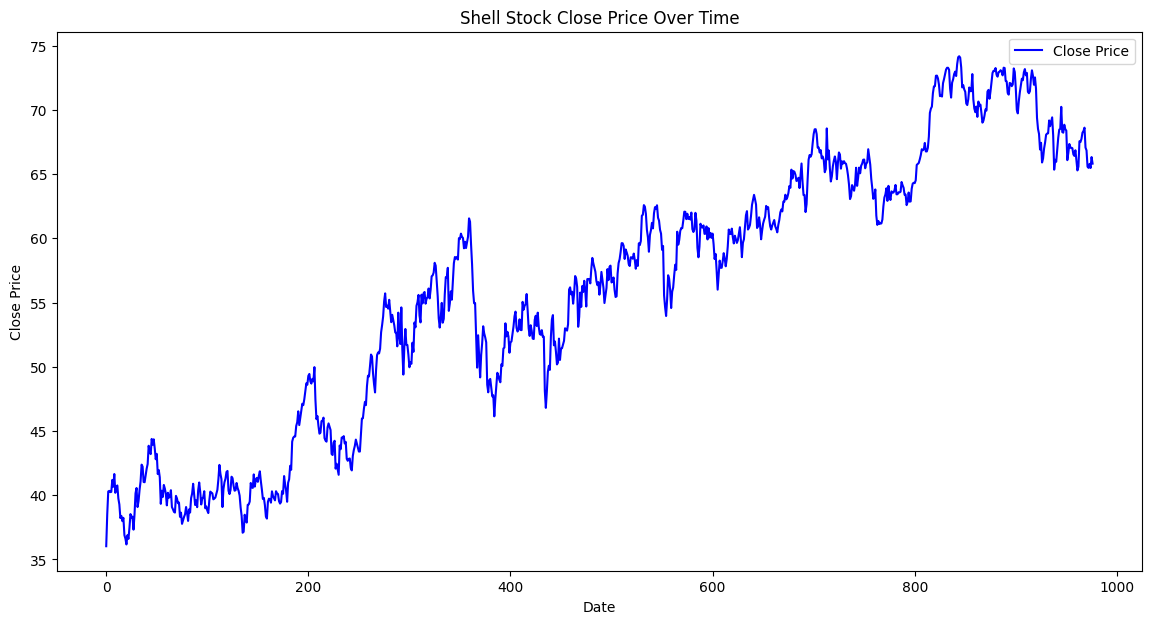

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Time Series Visualization
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title('Shell Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

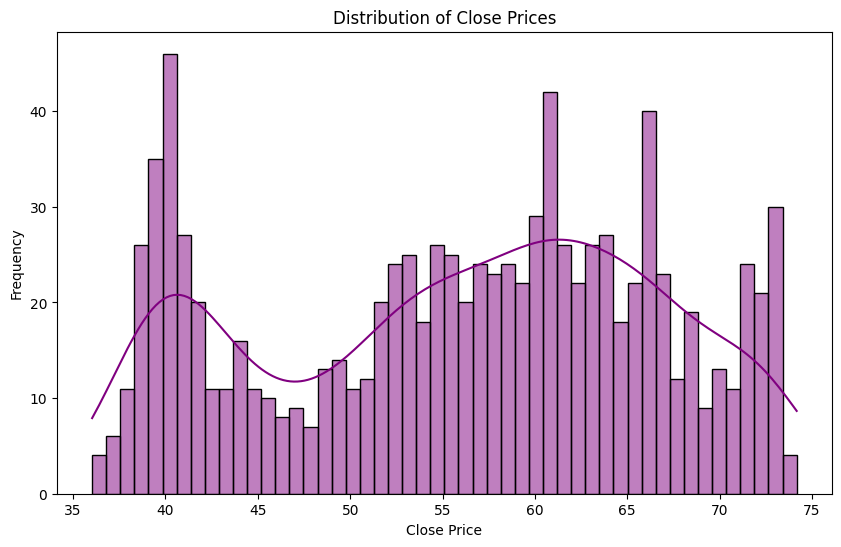

In [41]:
# Distribution of Close Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], kde=True, bins=50, color='purple')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

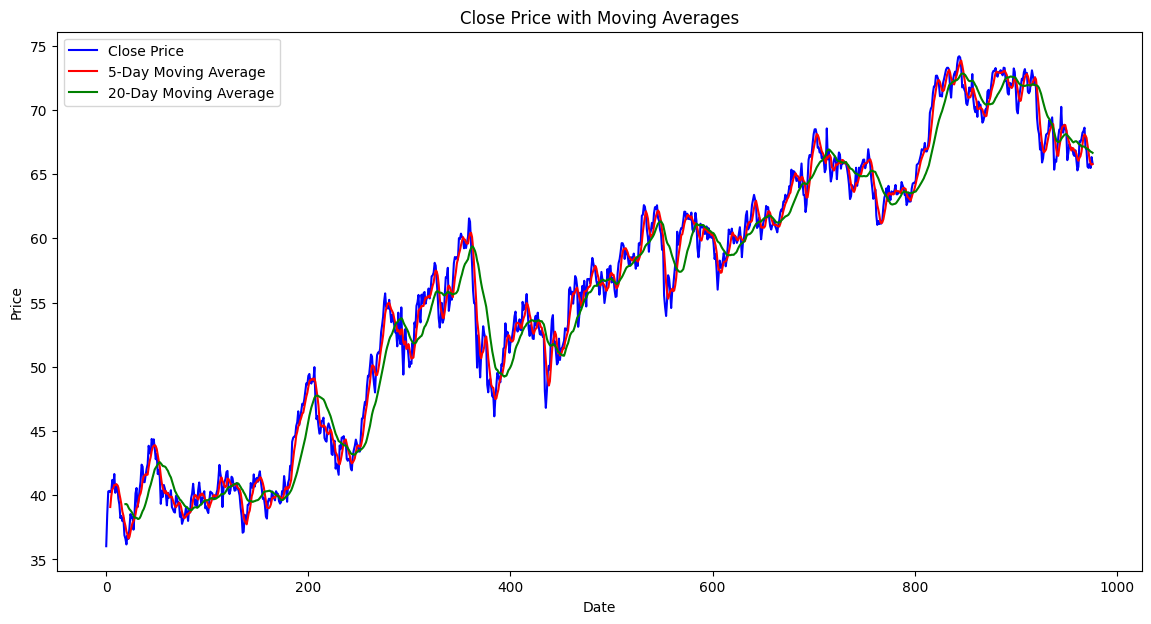

In [42]:
# Moving Averages Visualization
data['MA_5'] = data['Close'].rolling(window=5).mean()
data['MA_20'] = data['Close'].rolling(window=20).mean()

plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['MA_5'], label='5-Day Moving Average', color='red')
plt.plot(data['MA_20'], label='20-Day Moving Average', color='green')
plt.title('Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

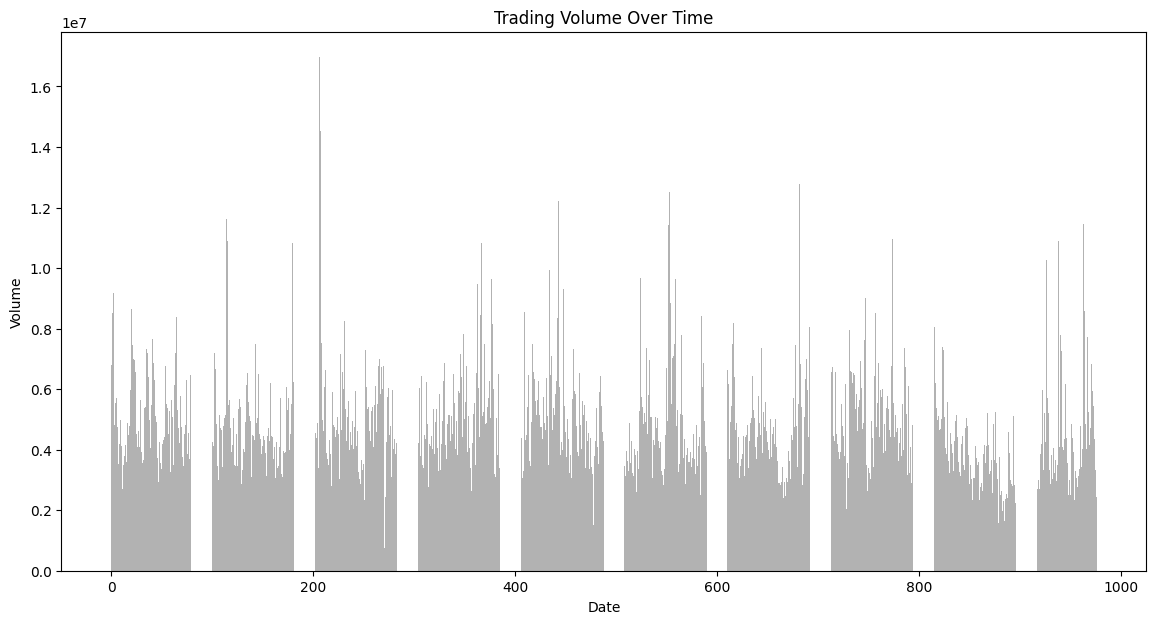

In [43]:
# Volume Analysis
plt.figure(figsize=(14, 7))
plt.bar(data.index, data['Volume'], color='grey', alpha=0.6)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

#### <i> Data Preprocessing </i>

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


# Convert 'Date' column to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Drop rows with missing values (optional: use imputation if needed)
data.dropna(inplace=True)

# Feature Engineering
# Add a column for daily price change
data['Price_Change'] = data['Close'] - data['Open']

# Add a column for percentage price change
data['Pct_Change'] = (data['Price_Change'] / data['Open']) * 100

# Add moving averages (5-day and 20-day)
data['MA_5'] = data['Close'].rolling(window=5).mean()
data['MA_20'] = data['Close'].rolling(window=20).mean()

# Drop rows with NaN values generated by moving averages
data.dropna(inplace=True)

# Define a binary classification target: Up (1) if the next day's Close is higher, Down (0) otherwise
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)
data.dropna(inplace=True)

# Define features (X) and target variable (y)
X = data[['Open', 'High', 'Low', 'Volume', 'Price_Change', 'Pct_Change', 'MA_5', 'MA_20']]
y = data['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Feature scaling using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Missing values per column:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


#### <i> Modeling </i>
#### <i> Logistic Regression </i>

In [27]:
# Apply Classification Algorithms
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_preds)
print("Logistic Regression Report:")
print(classification_report(y_test, lr_preds))
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.38      0.20      0.26        87
           1       0.52      0.73      0.61       105

    accuracy                           0.49       192
   macro avg       0.45      0.46      0.43       192
weighted avg       0.46      0.49      0.45       192

Logistic Regression Accuracy: 0.49


#### <i> Random Forest Classifier </i>

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_preds)
print("Random Forest Report:")
print(classification_report(y_test, rf_preds))
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Report:
              precision    recall  f1-score   support

           0       0.47      0.90      0.62        87
           1       0.65      0.16      0.26       105

    accuracy                           0.49       192
   macro avg       0.56      0.53      0.44       192
weighted avg       0.57      0.49      0.42       192

Random Forest Accuracy: 0.49


#### <i> Support Vector Classifier </i>

In [29]:
# Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)
svc_preds = svc_model.predict(X_test_scaled)
svc_accuracy = accuracy_score(y_test, svc_preds)
print("Support Vector Classifier Report:")
print(classification_report(y_test, svc_preds))
print(f"Support Vector Classifier Accuracy: {svc_accuracy:.2f}")

Support Vector Classifier Report:
              precision    recall  f1-score   support

           0       0.51      0.69      0.59        87
           1       0.64      0.45      0.53       105

    accuracy                           0.56       192
   macro avg       0.57      0.57      0.56       192
weighted avg       0.58      0.56      0.55       192

Support Vector Classifier Accuracy: 0.56


#### <i> Comparison Of Models </i>

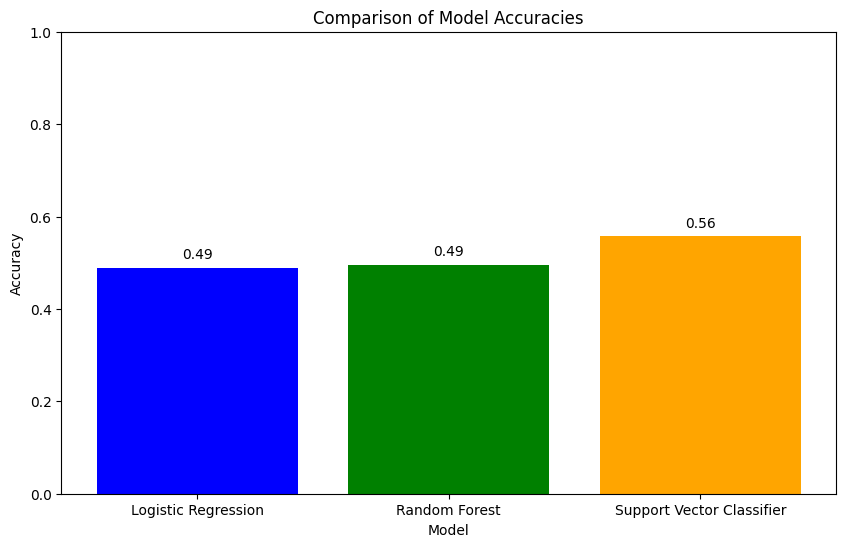

In [30]:
from matplotlib import pyplot as plt

# Visualization of Model Performance
models = ['Logistic Regression', 'Random Forest', 'Support Vector Classifier']
accuracies = [lr_accuracy, rf_accuracy, svc_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center')
plt.show()